### Ciência dos dados [Projeto 3]: PNADC - Uso dos microdados de 2023
### Profa Orientadora: Maria Kelly Venezuela
### Grupo 8:
    - Guilherme Mitsuo Yabushita Nakama
    - Lina Furukawa Queiros
    - Lucca de Magalhães Castro Fernandes
    - Maria Clara Hirano
___

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

___
### URL das base de dados da PNADC <br>
Microdados dos quatro trimestres de 2023 que estão armazenados, por ora, no **Dropbox da profa. Maria Kelly Venezuela**. <br>
Nota: Esses dados são de uso exclusivo dos alunos da Engenharia do Insper.

In [11]:
# PRIMEIRO TRIMESTRE DE 2023
url1 = 'https://www.dropbox.com/scl/fi/fv6fli3jyuinijotw9v6b/pnad23_1.csv?rlkey=1nq6xfd1fn7guz4nyhvwslp7p&st=qpr7odgu&dl=1'

# SEGUNDO TRIMESTRE DE 2023
url2 = 'https://www.dropbox.com/scl/fi/kvhduq8ocy2o1yj4l0ycc/pnad23_2.csv?rlkey=ni8nhwkv84xg59mp1cnd4gsto&st=yr8uiq5k&dl=1'

# TERCEIRO TRIMESTRE DE 2023
url3 = 'https://www.dropbox.com/scl/fi/ol5m8stpd50e7endyal5d/pnad23_3.csv?rlkey=kik14kn4wqbcbdsmgq44z2i4s&st=9reoxjte&dl=1'

# QUARTO TRIMESTRE DE 2023
url4 = 'https://www.dropbox.com/scl/fi/ksca0i4ybo6hno738pjcw/pnad23_4.csv?rlkey=e186niofxka6lmmlbkefr94zw&st=wntcupiu&dl=1'

### Leitura da Base de Dados Inteira - 2o TRIMESTRE de 2023<br>

In [72]:
pnad23_2_all = pd.read_csv(url2)
pnad23_2_all

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,2023,2,11,11.0,NaN,110000016,1110011,1,10,3,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
1,2023,2,11,11.0,NaN,110000016,1110011,1,10,3,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
2,2023,2,11,11.0,NaN,110000016,1110011,2,10,3,...,217.964623,98.704681,108.979781,230.958261,0.000000,0.000000,248.378245,0.000000,0.0,111.051514
3,2023,2,11,11.0,NaN,110000016,1110011,3,10,3,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
4,2023,2,11,11.0,NaN,110000016,1110011,3,10,3,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,2023,2,53,53.0,NaN,530060880,5310111,13,11,1,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474571,2023,2,53,53.0,NaN,530060880,5310111,13,11,1,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474572,2023,2,53,53.0,NaN,530060880,5310111,14,11,1,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000
474573,2023,2,53,53.0,NaN,530060880,5310111,14,11,1,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000


### Leitura das Colunas Analisadas <br>
Nota: Para saber o significado das linhas e colunas, veja o arquivo Excel `dicionario_PNADC_microdados_trimestral.xlsx`

In [75]:
# Colunas selecionadas:
colunas = ['Ano',
           'Trimestre',
           'UF',    # Estado
           'V1022', # Situação do domicílio
           'V2007', # Sexo
           'V2009', # Idade
           'V2010', # Cor ou raça
           'V3009A', # Nível de instrução mais elevado alcançado
           'V4012', # Posição ocupada no trabalho principal
           'V403312',] # Rendimento bruto mensal

# Leitura da base de dados filtrando apenas as colunas contidas na lista 'colunas'
pnad23_2_small = pd.read_csv(url2, usecols=colunas)

# Renomeando as colunas para facilitar a compreensão
pnad23_2_small.rename(columns={'V1022':'Area',
                               'V2007':'Sexo',
                               'V2009':'Idade',
                               'V2010':'Cor_Raca',
                               'V3009A':'Escolaridade',
                               'V4012':'Trabalho',
                               'V403312':'Renda'}, inplace=True)
pnad23_2_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Trabalho,Renda
0,2023,2,11,1,1,30,4,10.0,6.0,5000.0
1,2023,2,11,1,2,29,4,10.0,NaN,NaN
2,2023,2,11,1,2,50,4,12.0,4.0,3500.0
3,2023,2,11,1,2,25,4,10.0,NaN,NaN
4,2023,2,11,1,2,2,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
474570,2023,2,53,1,1,38,1,13.0,3.0,10000.0
474571,2023,2,53,1,2,30,1,NaN,3.0,2500.0
474572,2023,2,53,1,1,51,1,12.0,3.0,5000.0
474573,2023,2,53,1,2,56,1,12.0,4.0,5000.0


___

### Alteração da Descrição das Variáveis Qualitativas 
Nota: Para saber o significado das categorias, veja o arquivo Excel `dicionario_PNADC_microdados_trimestral.xlsx`

#### UF (Estado da Residência)

In [76]:
pnad23_2_small.UF = pnad23_2_small.UF.astype('category')
pnad23_2_small.UF = pnad23_2_small.UF.cat.rename_categories({11:'Rondônia',
                                                             12:'Acre',
                                                             13:'Amazonas',
                                                             14:'Roraima',
                                                             15:'Pará',
                                                             16:'Amapá',
                                                             17:'Tocantins', 
                                                             21:'Maranhão',
                                                             22:'Piauí',
                                                             23:'Ceará',
                                                             24:'Rio Grande do Norte',
                                                             25:'Paraíba',
                                                             26:'Pernambuco',
                                                             27:'Alagoas',
                                                             28:'Sergipe',
                                                             29:'Bahia',
                                                             31:'Minas Gerais',
                                                             32:'Espírito Santo',
                                                             33:'Rio de Janeiro',
                                                             35:'São Paulo',
                                                             41:'Paraná',
                                                             42:'Santa Catarina',
                                                             43:'Rio Grande do Sul',
                                                             50:'Mato Grosso do Sul',
                                                             51:'Mato Grosso',
                                                             52:'Goiás',
                                                             53:'Distrito Federal',})
pnad23_2_small.UF.value_counts(True).round(3)*100

UF
São Paulo              7.8
Minas Gerais           7.4
Rio de Janeiro         7.1
Maranhão               6.5
Santa Catarina         6.4
Paraná                 5.3
Rio Grande do Sul      5.3
Bahia                  4.8
Ceará                  4.7
Alagoas                4.2
Pernambuco             4.1
Pará                   3.7
Espírito Santo         3.6
Goiás                  3.3
Amazonas               3.0
Mato Grosso            2.7
Paraíba                2.6
Piauí                  2.3
Mato Grosso do Sul     2.2
Rio Grande do Norte    2.0
Acre                   2.0
Distrito Federal       1.9
Sergipe                1.9
Rondônia               1.7
Tocantins              1.5
Roraima                1.2
Amapá                  0.9
Name: proportion, dtype: float64

#### Área de Residência

In [77]:
pnad23_2_small.Area = pnad23_2_small.Area.astype('category')
pnad23_2_small.Area = pnad23_2_small.Area.cat.rename_categories({1:'Urbana',
                                                                 2:'Rural'})
pnad23_2_small.Area.value_counts(True).round(3)*100

Area
Urbana    73.4
Rural     26.6
Name: proportion, dtype: float64

#### Sexo

In [78]:
pnad23_2_small.Sexo = pnad23_2_small.Sexo.astype('category')
pnad23_2_small.Sexo = pnad23_2_small.Sexo.cat.rename_categories({1:'Homem', 2:'Mulher'})
pnad23_2_small.Sexo.value_counts(True).round(3)*100

Sexo
Mulher    51.6
Homem     48.4
Name: proportion, dtype: float64

#### Cor e Raça

In [79]:
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.astype('category')
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.cat.rename_categories({1:'Branca',
                                                                         2:'Preta',
                                                                         3:'Amarela',
                                                                         4:'Parda',
                                                                         5:'Indígena',
                                                                         9:'Ignorado'})
pnad23_2_small.Cor_Raca.value_counts(True).round(3)*100

Cor_Raca
Parda       49.8
Branca      39.4
Preta        9.7
Amarela      0.6
Indígena     0.6
Ignorado     0.0
Name: proportion, dtype: float64

#### Escolaridade

In [80]:
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.astype('category')
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.cat.rename_categories({1:'Creche',
                                                                                 2:'Pré-escola',
                                                                                 3:'Classe de alfabetização',
                                                                                 4:'Alfabetização de adultos',
                                                                                 5:'Antigo primário (elementar)',
                                                                                 6:'Antigo ginásio (médio 1º ciclo)',
                                                                                 7:'Regular do ensino fundamental ou do 1º grau',
                                                                                 8:'Educação de jovens e adultos (EJA) ou supletivo do 1º grau',
                                                                                 9:'Antigo científico, clássico, etc. (médio 2º ciclo)',
                                                                                 10:'Regular do ensino médio ou do 2º grau',
                                                                                 11:'Educação de jovens e adultos (EJA) ou supletivo do 2º grau',
                                                                                 12:'Superior - graduação',
                                                                                 13:'Especialização de nível superior',
                                                                                 14:'Mestrado',
                                                                                 15:'Doutorado',
                                                                                 '':'Não aplicável'})
pnad23_2_small.Escolaridade.value_counts(True).round(3)*100

Escolaridade
Regular do ensino médio ou do 2º grau                         36.0
Regular do ensino fundamental ou do 1º grau                   27.1
Superior - graduação                                          13.8
Antigo primário (elementar)                                   10.4
Especialização de nível superior                               3.7
Classe de alfabetização                                        1.9
Antigo ginásio (médio 1º ciclo)                                1.7
Educação de jovens e adultos (EJA) ou supletivo do 2º grau     1.5
Antigo científico, clássico, etc. (médio 2º ciclo)             1.1
Educação de jovens e adultos (EJA) ou supletivo do 1º grau     1.1
Mestrado                                                       0.6
Alfabetização de adultos                                       0.5
Pré-escola                                                     0.3
Doutorado                                                      0.3
Name: proportion, dtype: float64

#### Posição de Trabalho

In [81]:
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.astype('category')
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.cat.rename_categories({1:'Trabalhador doméstico',
                                                                         2:'Militar do exército',
                                                                         3:'Empregado do setor privado',
                                                                         4:'Empregado do setor público',
                                                                         5:'Conta própria',
                                                                         6:'Empregador',
                                                                         7:'Trabalhador não remunerado',
                                                                         '':'Não aplicável',})
pnad23_2_small.Trabalho.value_counts(True).round(3)*100

Trabalho
Empregado do setor privado    45.1
Empregador                    28.2
Empregado do setor público    13.0
Trabalhador doméstico          6.3
Conta própria                  4.0
Trabalhador não remunerado     2.6
Militar do exército            0.8
Name: proportion, dtype: float64

In [95]:
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.cat.rename_categories({1:'Doméstico',
                                                                         2:'Militar',
                                                                         3:'CLT Priv',
                                                                         4:'CLT Publico',
                                                                         5:'Autônomo',
                                                                         6:'PJ',
                                                                         7:'Não Remun',
                                                                         '':'Não aplicável',})

<Figure size 1500x800 with 0 Axes>

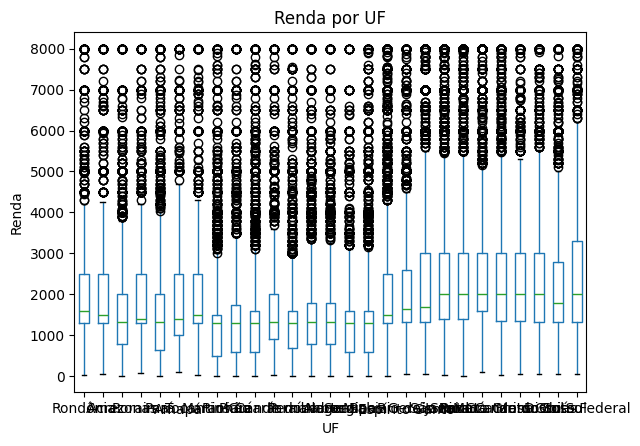

<Figure size 1500x800 with 0 Axes>

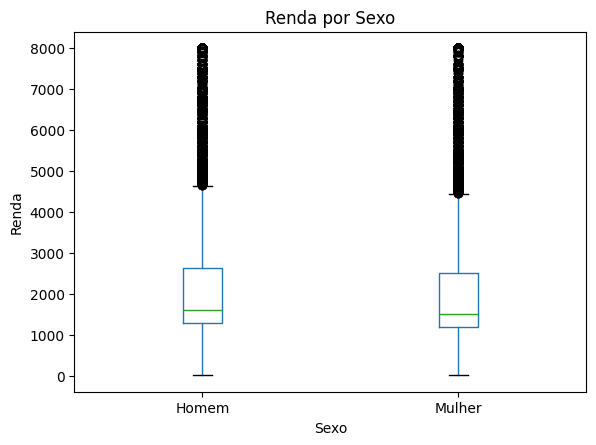

<Figure size 1500x800 with 0 Axes>

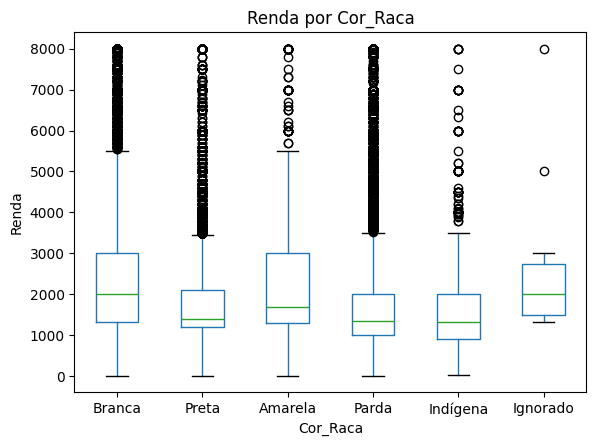

<Figure size 1500x800 with 0 Axes>

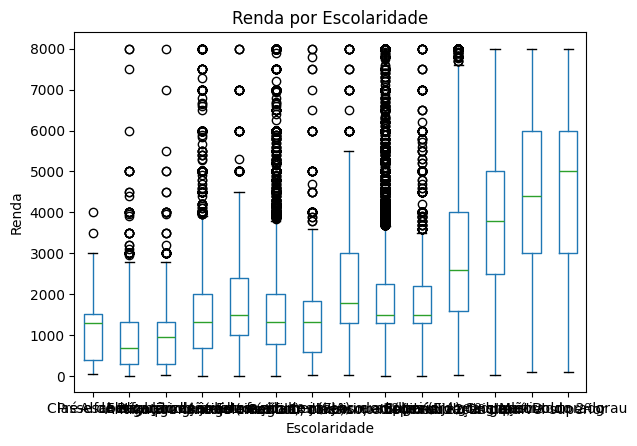

<Figure size 1500x800 with 0 Axes>

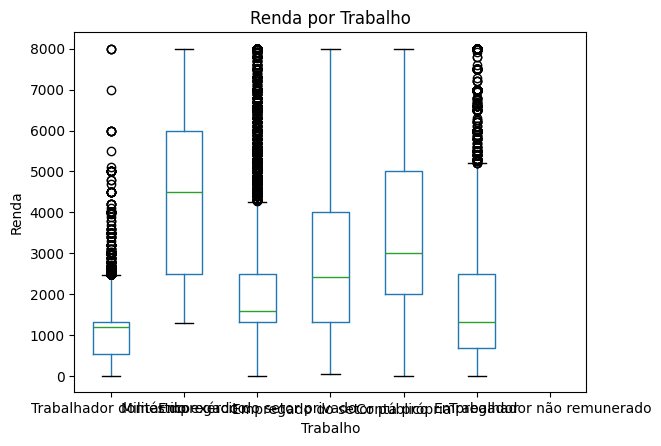

<Figure size 1500x800 with 0 Axes>

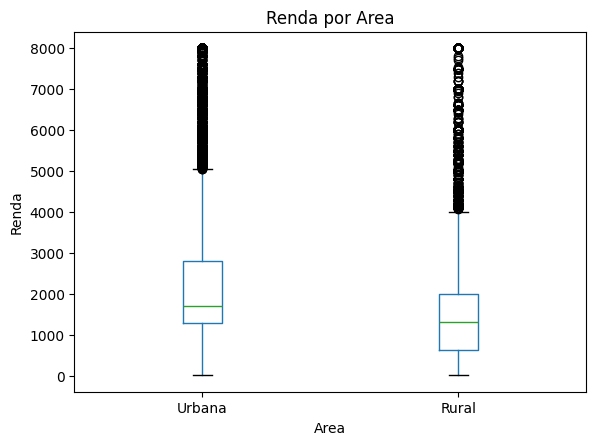

In [96]:
# Definição da função auxiliar para boxplots com limitação de faixa de renda
def boxplot_renda_por_variavel(df, variavel, limite):
    plt.figure(figsize=(15, 8))

    # Filtra os dados para excluir valores acima do limite superior
    df_filtrado = df[df.Renda <= limite]

    df_filtrado.boxplot(column='Renda', by=variavel, grid=False)
    plt.title(f'Renda por {variavel}')
    plt.suptitle('')
    plt.xlabel(variavel)
    plt.ylabel('Renda')
    plt.show()

# Encontrando o limite superior baseado no 95º percentil da renda
limite_95 = pnad23_2_small.Renda.quantile(0.95)

# Chamar a função para cada variável categórica com o limite superior definido
variaveis = ['UF','Sexo', 'Cor_Raca', 'Escolaridade', 'Trabalho', 'Area']
for variavel in variaveis:
    boxplot_renda_por_variavel(pnad23_2_small, variavel, limite_95)

#### Gráfico de Dispersão - Idade x Renda

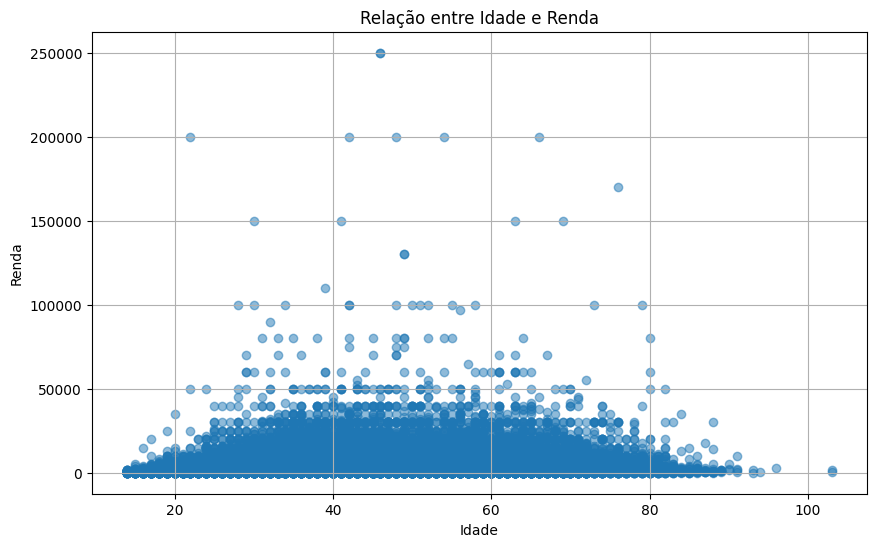

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(pnad23_2_small.Idade, pnad23_2_small.Renda, alpha=0.5)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.grid(True)
plt.show()